In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

In [ ]:
data_1 = pd.read_csv('Produksi Buah–Buahan dan Sayuran Tahunan Menurut Jenis Tanaman di Kabupaten Jember, 2019.csv')
data_2 = pd.read_csv('Produksi Buah–Buahan dan Sayuran Tahunan Menurut Jenis Tanaman di Kabupaten Jember, 2020.csv').drop(columns=['Jenis Tanaman'],axis=1)
data_3 = pd.read_csv('Produksi Buah–Buahan dan Sayuran Tahunan Menurut Jenis Tanaman di Kabupaten Jember, 2021.csv').drop(columns=['Jenis Tanaman'],axis=1)
data_4 = pd.read_csv('Produksi Buah–Buahan dan Sayuran Tahunan Menurut Jenis Tanaman di Kabupaten Jember, 2022.csv').drop(columns=['Jenis Tanaman'],axis=1)
data_5 = pd.read_csv('Produksi Buah–Buahan dan Sayuran Tahunan Menurut Jenis Tanaman di Kabupaten Jember, 2023.csv').drop(columns=['Jenis Tanaman'],axis=1)
data = pd.concat([data_1,data_2,data_3,data_4,data_5],axis=1)
data.columns = ['Jenis Tanaman','2019','2020','2021','2022','2023']
data.replace('...', np.nan, inplace=True)
data[['2019', '2020', '2021', '2022', '2023']] = data[['2019', '2020', '2021', '2022', '2023']].apply(pd.to_numeric, errors='coerce')
data.iloc[:, 1:] = data.iloc[:, 1:].apply(lambda col: col.fillna(col.mean()))
data

,Jenis Tanaman,2019,2020,2021,2022,2023
0,Alpukat/Avocado(kw/qui),2.026100e+04,4.146700e+04,50899.0,8.256200e+04,104519.00
1,Anggur/Grape(kw/qui),7.270000e+02,7.100000e+02,687.0,7.200000e+02,598.00
2,Apel/Apple(kw/qui),2.566847e+05,1.250000e+02,106918.4,2.194658e+05,257003.28
3,Belimbing/Star Fruit(kw/qui),4.424100e+04,3.062200e+04,21270.0,1.774100e+04,36039.00
4,Duku/Langsat/Kokosan/Duku(kw/qui),1.883700e+04,1.319800e+04,19884.0,8.021800e+04,28037.00
5,Durian/Durian(kw/qui),8.406000e+04,6.728400e+04,36526.0,3.530110e+05,225491.00
6,Jambu Air/Water Apple(kw/qui),7.378000e+03,9.927000e+03,15708.0,2.961000e+04,25028.00
7,Jambu Biji/Guava(kw/qui),3.156600e+04,4.648500e+04,26920.0,1.109100e+05,159007.00
8,Jengkol/Jengkol(kw/qui),3.150000e+02,1.631023e+05,106918.4,1.400000e+01,257003.28
9,Jeruk Besar/Pomelo(kw/qui),1.523000e+03,1.933000e+03,142.0,3.511000e+03,261.00


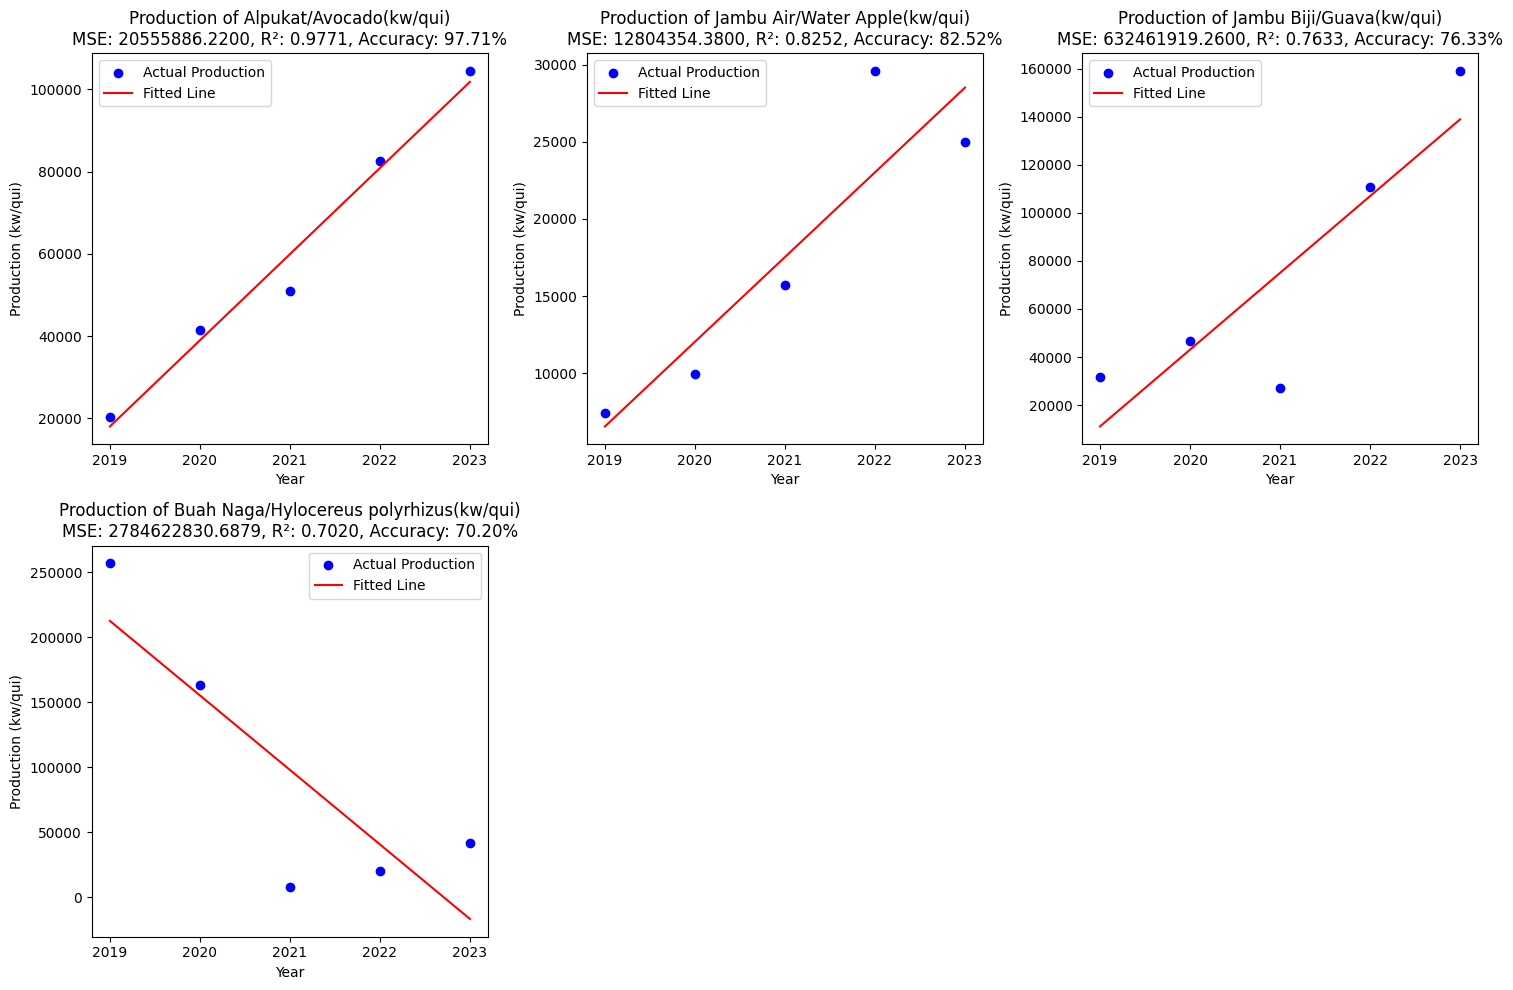

In [ ]:
for year in ['2019', '2020', '2021', '2022', '2023']:
    data[year] = pd.to_numeric(data[year].replace(',', '', regex=True), errors='coerce')
df = data.loc[[0,6,7,24]]
df = df.reset_index(drop=True)

num_plants = len(df)
cols = 3
rows = (num_plants // cols) + (num_plants % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for index, row in df.iterrows():
    plant = row['Jenis Tanaman']
    y = row[1:].values
    years = np.array([2019, 2020, 2021, 2022, 2023])

    model = LinearRegression()
    model.fit(years.reshape(-1, 1), y)

    y_pred = model.predict(years.reshape(-1, 1))
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)

    ax = axes[index]
    ax.scatter(years, y, color='blue', label='Actual Production')
    ax.plot(years, y_pred, color='red', label='Fitted Line')
    ax.set_title(f'Production of {plant}\nMSE: {mse:.4f}, R²: {r_squared:.4f}, Accuracy: {r_squared*100:.2f}%')
    ax.set_xlabel('Year')
    ax.set_ylabel('Production (kw/qui)')
    ax.set_xticks(years)
    ax.set_xticklabels(years)
    ax.legend()
    
for i in range(num_plants, len(axes)):
    fig.delaxes(axes[i])    

plt.tight_layout()
plt.show()

In [4]:

predictions_list = []

for index, row in df.iterrows():
    plant = row['Jenis Tanaman']
    y = row[1:].values
    years = np.array([2019, 2020, 2021, 2022, 2023])

    model = LinearRegression()
    model.fit(years.reshape(-1, 1), y)

    future_years = np.array([2024, 2025, 2026, 2027, 2028])
    future_predictions = model.predict(future_years.reshape(-1, 1))
    data = {"Jenis Tanaman": plant}
    
    for year, prediction in zip(future_years, future_predictions):
        data[f"{year}"] = prediction
    predictions_list.append(data)

predictions_df = pd.DataFrame(predictions_list)
predictions_df.index = range(1,len(predictions_df) + 1)

print(tabulate(predictions_df,headers= predictions_df.columns,tablefmt="double_grid"))

╔════╦═════════════════════════════════════════╦══════════╦═══════════╦═══════════╦═════════╦═══════════╗
║    ║ Jenis Tanaman                           ║     2024 ║      2025 ║      2026 ║    2027 ║      2028 ║
╠════╬═════════════════════════════════════════╬══════════╬═══════════╬═══════════╬═════════╬═══════════╣
║  1 ║ Alpukat/Avocado(kw/qui)                 ║ 122825   ║  143786   ║  164747   ║  185708 ║  206669   ║
╠════╬═════════════════════════════════════════╬══════════╬═══════════╬═══════════╬═════════╬═══════════╣
║  2 ║ Jambu Air/Water Apple(kw/qui)           ║  34025.1 ║   39523.4 ║   45021.7 ║   50520 ║   56018.3 ║
╠════╬═════════════════════════════════════════╬══════════╬═══════════╬═══════════╬═════════╬═══════════╣
║  3 ║ Jambu Biji/Guava(kw/qui)                ║ 170770   ║  202700   ║  234631   ║  266562 ║  298492   ║
╠════╬═════════════════════════════════════════╬══════════╬═══════════╬═══════════╬═════════╬═══════════╣
║  4 ║ Buah Naga/Hylocereus polyrhizus(kw/qui)